In [41]:
%load_ext autoreload
%autoreload 2

from scipy.ndimage import gaussian_filter
import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt

import tensortools.numpy.fft as np_fft
import tensortools.tf.fft as tf_fft

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(101, 101)


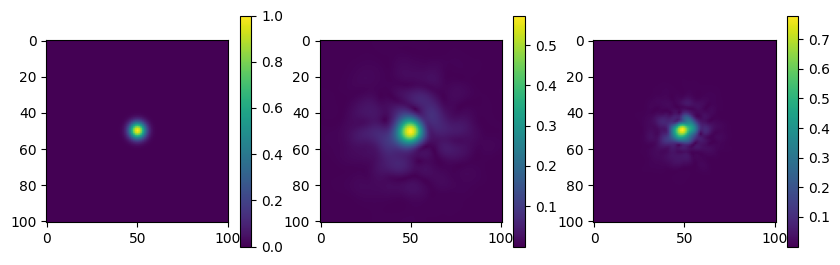

In [42]:
sz = 100
x = np.arange(-sz//2, sz//2+1)
X, Y = np.meshgrid(x, x)
R = np.sqrt(np.square(X) + np.square(Y))

phi_np = gaussian_filter(2 * np.pi * np.random.rand(*X.shape), sigma=1)
z_np = np.exp(-np.square(R)/20) * np.exp(1j * phi_np)
print(z_np.shape)
ft_np = np_fft.fft2(z_np)
frt_np = np_fft.ffrt2(z_np, dz=40e-6, pixel_size=1e-6, wavelength=1064e-9)

fig, axs = plt.subplots(1, 3, figsize=(10,3))
pl0 = axs[0].imshow(np.abs(z_np))
pl1 = axs[1].imshow(np.abs(ft_np))
pl2 = axs[2].imshow(np.abs(frt_np))
_ = [plt.colorbar(pl, ax=axs[i]) for i, pl in enumerate([pl0, pl1, pl2])]

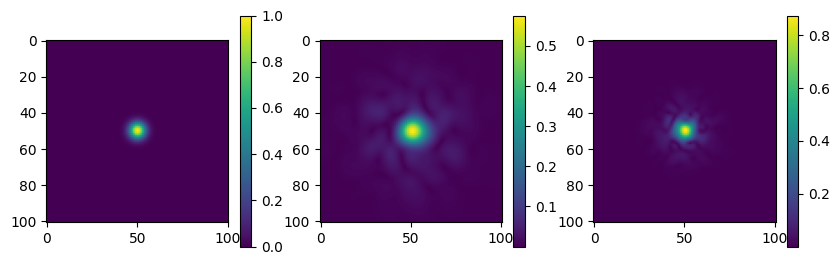

In [33]:
z_tf = tf.convert_to_tensor(z_np)
ft_tf = tf_fft.fft2(z_tf)
frt_tf = tf_fft.ffrt2(z_tf, dz=40e-6, pixel_size=1e-6, wavelength=1064e-9)


fig, axs = plt.subplots(1, 3, figsize=(10,3))
pl0 = axs[0].imshow(np.abs(z_tf))
pl1 = axs[1].imshow(np.abs(ft_tf))
pl2 = axs[2].imshow(np.abs(frt_tf))
_ = [plt.colorbar(pl, ax=axs[i]) for i, pl in enumerate([pl0, pl1, pl2])]